# Packages

In [77]:
import ISLP
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import numpy as np

In [2]:
dir(ISLP)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_confusion_matrix',
 '_datasets',
 '_index',
 '_make_categorical',
 '_ordered',
 '_unordered',
 '_version',
 'as_file',
 'confusion_table',
 'files',
 'load_data',
 'np',
 'pd',
 'pjoin',
 'unique_labels']

In [3]:
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize,poly)
from matplotlib.pyplot import subplots

# 8. Auto

## a)

In [4]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
x = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,x)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### i.) Is there a relationship between the predictor and the response

Avec un p-value = 0 < alpha = 0.01, la puissance du moteur explique très significativement la consommation du carburant d'une voiture.

### iii.) Is the relationship between the predictor and the response positive or negative?

Le coefficient est égal à -0.15, négatif.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [6]:
horsepower_new = [1, 98]
new_prediction = result.get_prediction(horsepower_new)
print("pour uune voiture de 98 cheveaux, on prédit:", new_prediction.predicted, "miles per gallon")

pour uune voiture de 98 cheveaux, on prédit: [24.46707715] miles per gallon


In [7]:
new_prediction.df

np.float64(390.0)

In [8]:
dir(new_prediction)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conf_int',
 'df',
 'dist',
 'dist_args',
 'predicted',
 'predicted_mean',
 'row_labels',
 'se',
 'se_mean',
 'se_obs',
 'summary_frame',
 'var_pred',
 'var_pred_mean',
 'var_resid']

## b) Plot the response and the predictor

In [9]:
def abline (ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] + b , m*xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\Mita\AppData\Local\Temp\ipykernel_3592\20067468.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],
C:\Users\Mita\AppData\Local\Temp\ipykernel_3592\20067468.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[1],


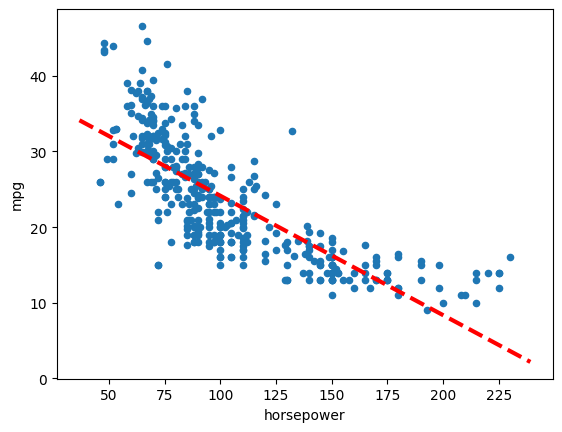

In [10]:
ax = Auto.plot.scatter('horsepower', 'mpg')

abline(ax,
       result.params[0],
       result.params[1],
       'r--',
       linewidth=3)

# c) Diagnostic plots of least squares regression fit

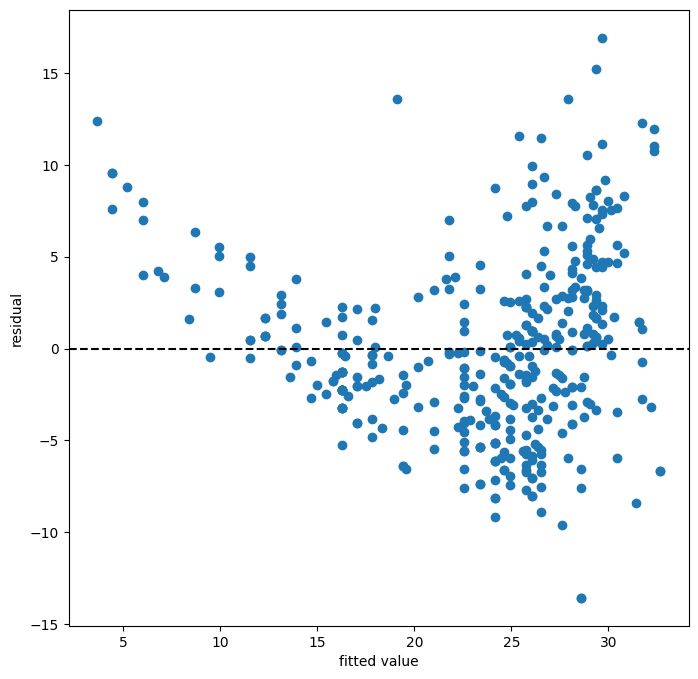

In [11]:
ax = subplots(figsize = (8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel("fitted value")
ax.set_ylabel("residual")
ax.axhline(0, c='k', ls = '--')

| Résidu (`resid`) | Relation mathématique | Interprétation |
|-----------------|----------------------|----------------|
| `resid > 0`     | y > ŷ                | Le modèle **sous-estime** la valeur réelle |
| `resid < 0`     | y < ŷ                | Le modèle **surestime** la valeur réelle |
| `resid ≈ 0`     | y ≈ ŷ                | Bonne prédiction |

Lorsque la valeur prédite tourne autour de 20 mpg, le modèle performe mieux. Par contre, au fur et à mesure qu'on s'éloigne de ce centre, on constate la chutte de la performance.  

Si la valeur prédite est inférieure à 20, resid tend à être négatif et donc le modèle sous-estime la valeur réelle et vice-versa.

# 9. Multiple linear regression

## a) Scatterplot matrix

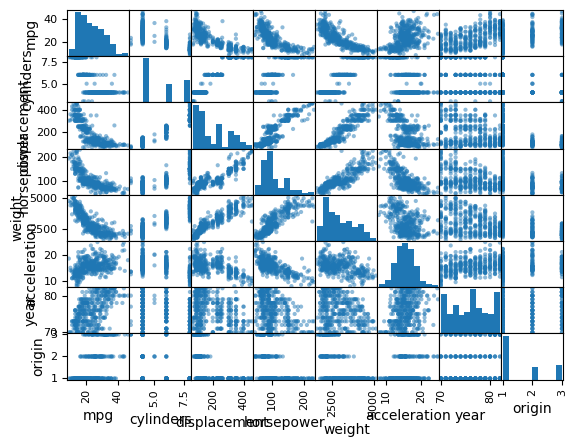

In [16]:
pd.plotting.scatter_matrix(Auto)
plt.show()

## b) Correlations

In [17]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


L'origine est le pays d'origine. La corrélation entre cette variable ne signifie pas grande chose.

## c) Regression

In [54]:
X_list = list(Auto.columns.drop("mpg"))
X = MS(X_list).fit_transform(Auto)
Y = Auto["mpg"]

In [55]:
model = sm.OLS(Y, X)
result = model.fit()
#summarize(result)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          2.04e-139
Time:                        10:49:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707   

### i)

Dans le test de Fisher, on teste l'hypothèse H0 selon laquelle tous les coefficients sont nuls. Vu que le p-value = 2.04e-139, nous avons des preuves rejetter H0. Ce qui veut dire qu'au moins une des variables explique "mpg".

### ii)

Les variables qui peuvent expliquer "mpg" sont : 
- displacement ; 
- weight ; 
- year ;
- origin. 

### iii)

Le coefficient lié à la variable "year" est égal à 0.75. Ce qui signifie qu'une voiture fabriquée une année après augmente le "mpg" de 0.75. Plus la voiture est récente, plus elle consomme moins de carburant. 

## d)

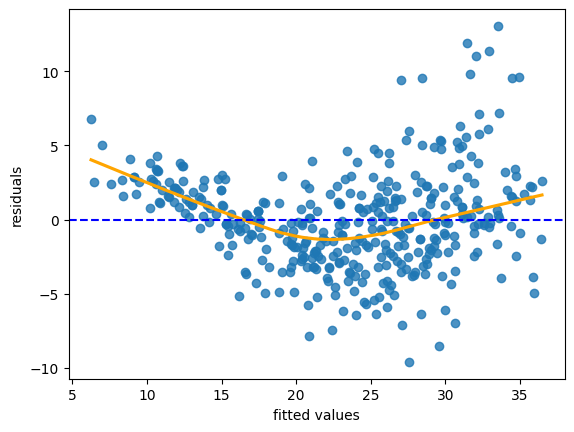

In [ ]:
# Le modèle linéaire est-il approprié ?
sns.regplot(
    x=result.fittedvalues,
    y=result.resid,
    lowess=True,
    line_kws={"color": "orange"}
)

plt.axhline(0, color='b', linestyle='--')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

Comme on peut le voir, la ligne rouge correspond à un lissage des résidus. Elle présente une forme en U marquée, ce qui constitue une forte indication de non-linéarité dans les données. Ainsi, le modèle linéaire n'est le plus adapté pour ce problème. 

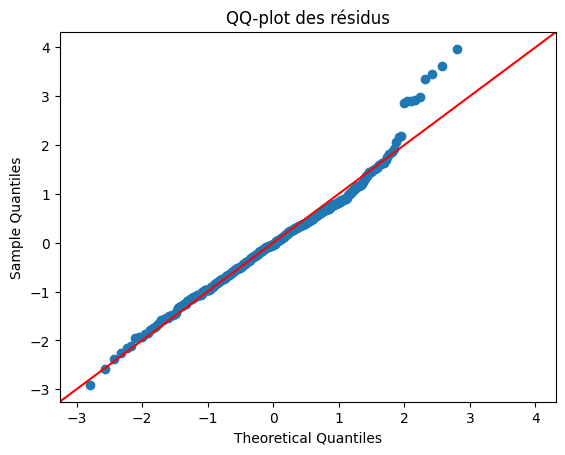

In [106]:
fig = sm.qqplot(
    result.resid,
    line='45',
    fit=True
)

plt.title("QQ-plot des résidus")
plt.show()

L'hypothèse de normalité des résidus tient la route.

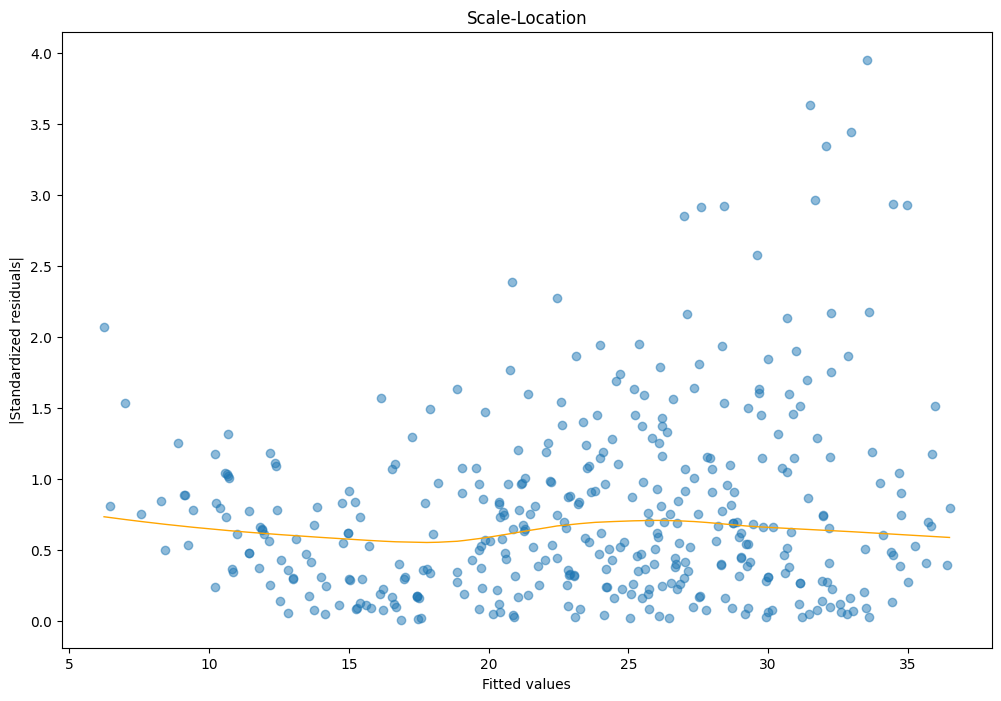

In [ ]:
# La variance des résidus est-elle constante pour toutes les valeurs ajustées ? Sommes-nous en face de l'homoscédasticité? 

infl = result.get_influence()

# Résidus standardisés
r = infl.resid_studentized_internal

# Valeurs ajustées
fitted = result.fittedvalues

# Valeur absolue des résidus standardisés
abs_r = np.abs(r)

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter
ax.scatter(fitted, abs_r, alpha=0.5)

# Lissage LOWESS
sns.regplot(
    x=fitted,
    y=abs_r,
    scatter=False,
    lowess=True,
    ci=False,
    line_kws=dict(color='orange', lw=1),
    ax=ax
)

ax.set(
    title="Scale-Location",
    xlabel="Fitted values",
    ylabel="|Standardized residuals|"
)

plt.show()

Aucune hétéroscédasticité marquée n’est observée, bien que quelques résidus plus élevés apparaissent pour les valeurs ajustées les plus grandes. On est dans l'hypothèse d'homoscédasticité. 

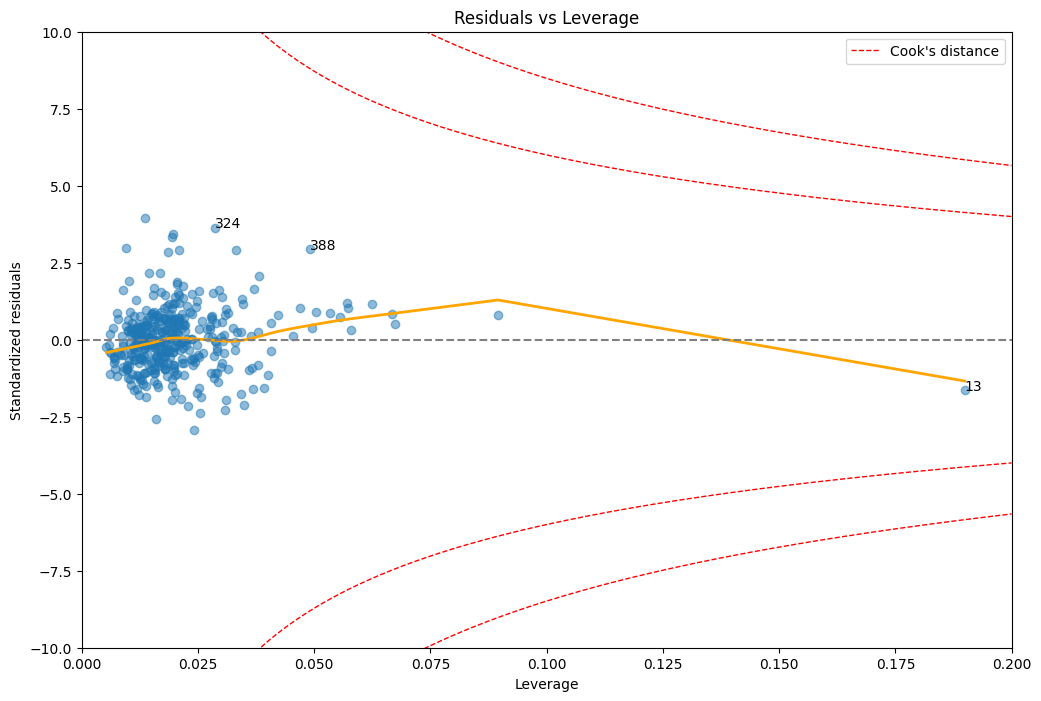

In [105]:
infl = result.get_influence()
r = infl.resid_studentized_internal
h = infl.hat_matrix_diag
D = infl.cooks_distance[0]
p = len(result.params)

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter
ax.scatter(h, r, alpha=0.5)

# LOWESS (tendance) en ORANGE
sns.regplot(
    x=h, y=r,
    scatter=False,
    lowess=True,
    ci=False,
    line_kws=dict(color='orange', lw=2),
    ax=ax
)

# Ligne y = 0
ax.axhline(0, color='gray', ls='--')

# Courbes de Cook (pointillés rouges)
hh = np.linspace(0.01, 0.20, 300)
for d in (0.5, 1):
    y = np.sqrt((d * p * (1 - hh)) / hh)
    ax.plot(hh,  y, 'r--', lw=1, label="Cook's distance" if d == 0.5 else None)
    ax.plot(hh, -y, 'r--', lw=1)

# Annoter les points les plus influents
for i in np.argsort(D)[-3:]:
    ax.annotate(i, (h[i], r[i]))

# 🔍 Dézoom contrôlé
ax.set_xlim(0, 0.20)
ax.set_ylim(-10, 10)

ax.set(
    title="Residuals vs Leverage",
    xlabel="Leverage",
    ylabel="Standardized residuals"
)

ax.legend(loc='upper right')
plt.show()

Le leverage explique la contribution des observations dans la droite de régression. Les résidus standartisés mesurent la dispersion de la prédiction par rapport aux vraies valeurs d'une manière relative. Plus, ils sont grands, plus on s'approche d'un outlier.

Le point 13 est à haut leverage (0.19) contribue énormément à la droite de régression. Il y a aussi un deuxième point qui se situe entre 0.075 et 0.1 leverage. 

On s'aperçoit aussi la présence de certains outliers qui s'écartent de l'interval [-2.5 ; 2.5] des résidus standartisés.